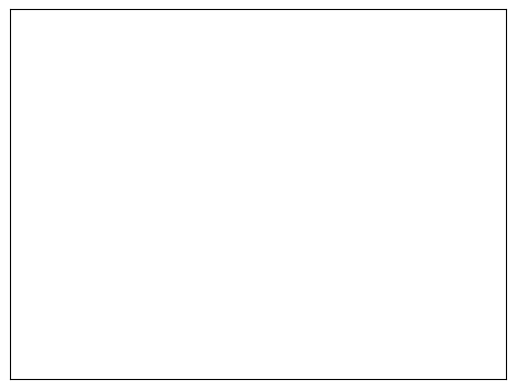

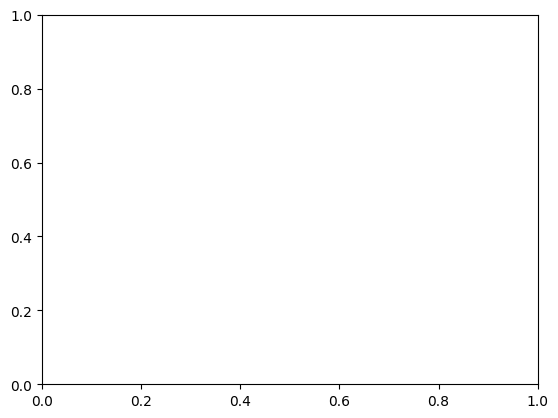

0
(6, 6)


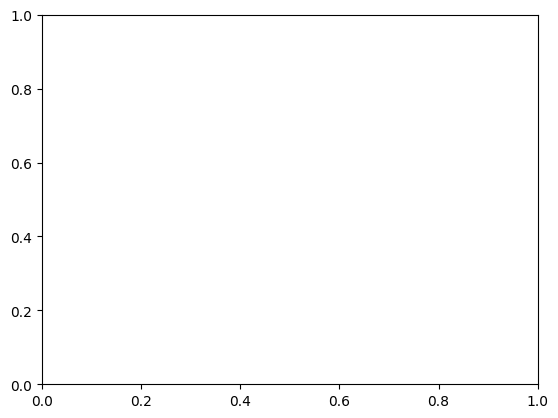

wrapped env obs [[[0 0 0 0 0 0 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]]

 [[1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


In [1]:
import gymnasium as gym
import gym_simplegrid


import gymnasium as gym
import numpy as np

class SymbolicGridObsWrapper(gym.ObservationWrapper):
    def __init__(self, env, obstacle_map):
        super().__init__(env)
        self.obstacle_map = obstacle_map
        self.rownum = len(obstacle_map)
        self.colnum = len(obstacle_map[0])
        # Define the observation space for the symbolic representation
        self.observation_space = gym.spaces.Box(
            low=0,
            high=1,
            shape=(3, self.rownum, self.colnum),  # 3 layers: map, agent, goal
            dtype=np.uint8
        )

    def observation(self, obs):
        # obs is the integer representing the agent's position in the original observation
        symbolic_map = np.zeros((3, self.rownum, self.colnum), dtype=np.uint8)
        
        # Fill in the obstacle map
        for i, row in enumerate(self.obstacle_map):
            for j, cell in enumerate(row):
                symbolic_map[0, i, j] = int(cell)
        
        # Decode the agent's position from the observation integer
        agent_row, agent_col = divmod(obs, self.colnum)
        symbolic_map[1, agent_row, agent_col] = 1  # Mark the agent's position
        
        # Retrieve and mark the goal's position using get_wrapper_attr
        goal_xy = self.env.get_wrapper_attr('goal_xy')
        goal_row, goal_col = goal_xy
        symbolic_map[2, goal_row, goal_col] = 1  # Mark the goal's position
        
        return symbolic_map

maps=[]

obstacle_map = [
        "0000000",
        "1111110",
        "1111110",
        "1111110",
        "1111110",
        "1111110",
        "1111110",
    ]
maps.append(obstacle_map)

obstacle_map = [
        "0000000",
        "0110110",
        "0110110",
        "0000000",
        "0110110",
        "0110110",
        "0000000",
    ]
maps.append(obstacle_map)

obstacle_map = [
        "0000000",
        "0101010",
        "0000000",
        "0101010",
        "0000000",
        "0101010",
        "0000000",
    ]
maps.append(obstacle_map)


obstacle_map = [
        "0000001",
        "0000001",
        "0000001",
        "0000001",
        "0000001",
        "0000000",
        "1111100",
    ]
maps.append(obstacle_map)


env = gym.make(
    'SimpleGrid-v0', 
    obstacle_map=maps[3], 
    render_mode='human'
)


obs, info = env.reset(options={'start_loc':0, 'goal_loc':48})
print(obs)
done = env.unwrapped.done


print(env.get_wrapper_attr('goal_xy'))

env=SymbolicGridObsWrapper(env,obstacle_map=maps[0])
obs, info = env.reset(options={'start_loc':0, 'goal_loc':48})
print('wrapped env obs',obs)



In [2]:
from stable_baselines3.common.env_checker import check_env

# It will check your custom environment and output additional warnings if needed
check_env(env)

TypeError: The reset() method must accept a `seed` parameter

In [ ]:

from stable_baselines3 import PPO

model = PPO("CnnPolicy", env, verbose=1,normalize_images=False)
# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("GymPlayground/trained_model")